# Final Project Silvia Sabela A
## Indikator Kemajuan Negara-negara di Dunia

### * Import Data
Mengimport data lifeexpectancy1.csv diambil dari https://www.kaggle.com/kacperk77/life-expectancy#lifeexpectancy1.csv yang berisi data-data inikator tingkat kemajuan suatu negara di seluruh dunia. Dengan keterangan sebagai berikut:

-Literacy rate, adult total (% of people ages 15 and above) 2014

-Homicidies per 100k people 2014

-Electric power consumption (kWh per capita) 2014

-Number of years of Schooling (years) 2014

-Deaths per 1 000 live births HIV/AIDS (0-4 years) 2014

-Economic development status of country 

-Access to improved water sources (% of total population with access) 2014

-Incidence of tuberculosis (per 100,000 people) 2014

-Inflation, consumer prices (annual %) 2014

-Average health expenditure per capita, PPP 2005-2014 : jumlah pengeluaran kesehatan publik dan swasta sebagai rasio dari total populasi. Ini mencakup penyediaan layanan kesehatan (preventif dan kuratif), kegiatan keluarga berencana, kegiatan gizi, dan bantuan darurat yang ditujukan untuk kesehatan.

-Fertility rate, total (births per woman) 2014

-Life expectancy at birth, total (years) 2014

-Individuals using the Internet (% of population) 2014

-GDP per capita, PPP (current international $) 2014

-Average CO2 emissions (metric tons per capita) 2005-2014

-Forest area (% of land area) 2014

-Urban population 2014

-Average urban population growth (annual %) 2005-2014

In [1]:
import numpy as np
import pandas as pd
    
df = pd.read_csv("lifeexpectancy1.csv")
df.head()

,Country,literacyrate,homicidiesper100k,electricity,Schooling,HIV.AIDS,Status,wateraccess,tuberculosis,inflation,healthexppercapita,fertilityrate,lifeexp,internet,gdppercapita,CO2,forest,urbanpop,urbanpopgrowth,leastdeveloped
0,Albania,96.845299,4.005786,2309.366503,14.2,0.1,Developing,95.1,16.0,1.613042,517.071413,1.710,77.963,60.100000,4578.667934,1.582049,28.191972,56.423,1.652458,0
1,Algeria,72.648679,1.475201,1356.264554,14.4,0.1,Developing,84.0,72.0,2.916927,624.662826,2.890,75.641,29.500000,5466.425778,3.326497,0.818057,70.221,2.826317,0
2,Armenia,99.744413,2.477445,1965.783733,12.7,0.1,Developing,100.0,57.0,2.981309,426.113567,1.634,74.255,54.622806,3994.712355,1.704295,11.654373,63.112,-0.465285,0
3,Azerbaijan,99.771144,2.483225,2202.393918,12.2,0.1,Developing,86.2,76.0,1.389726,718.455376,1.970,71.800,75.000016,7891.313147,3.845641,13.466485,54.422,1.798360,0
4,Bahrain,94.556792,0.523796,19592.231949,14.5,0.1,Developing,100.0,16.0,2.646291,1529.895347,2.078,76.622,90.503133,24983.379015,23.145268,0.765240,88.915,4.823102,0


### *Mencari Korelasi 

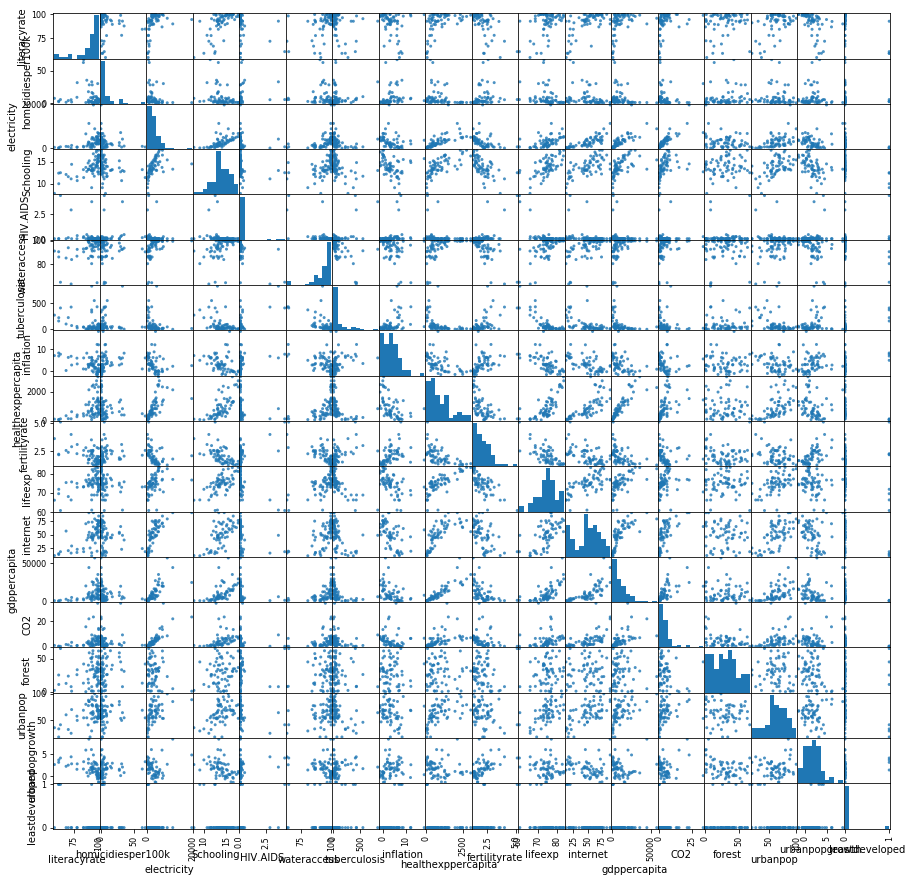

In [36]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#Memvisualisasi data dalam bentuk scatter matrix plot
scatter_matrix(df, alpha=0.8, figsize=(15,15))

plt.show()

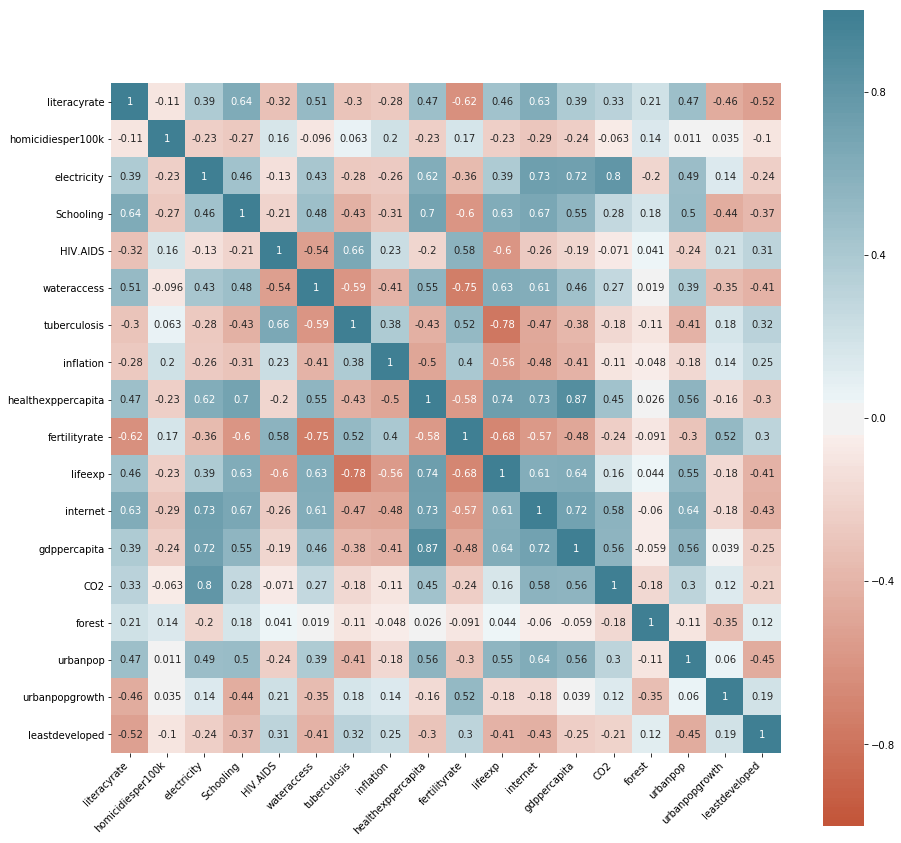

In [3]:
import seaborn as sns

plt.figure(figsize=(15,15))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### *Plot Data
Memplot data kedalam grafik dengan menggunakan matplotlib untuk mengetahui pola data

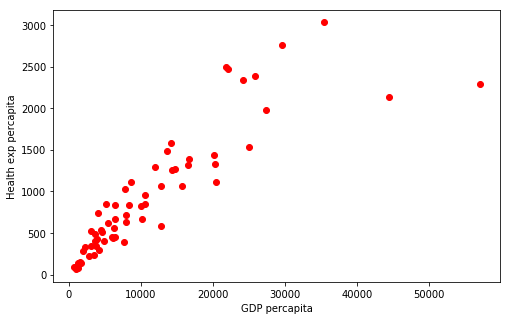

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
x_, y_ = (df["gdppercapita"].values, df["healthexppercapita"].values)
plt.plot(x_, y_, 'ro')
plt.ylabel('Health exp percapita')
plt.xlabel('GDP percapita')
plt.show()

### * Menghilangkan Outlier
Seperti yang telah di tampilkan pada grafik sebelumnya terdapat data yang nilainya terlalu jauh dibandingkan yang lain, sehingga perlu dihilangkan

In [5]:
dfClean = df[(df['gdppercapita'] <= 40000) & (df['healthexppercapita'] >0)]

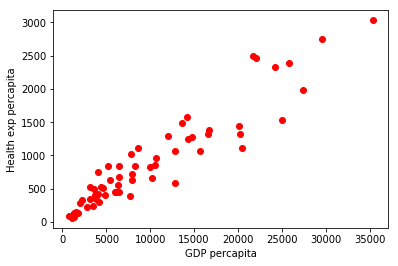

In [6]:
plt.figure
x_data, y_data = (dfClean['gdppercapita'].values, dfClean['healthexppercapita'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Health exp percapita')
plt.xlabel('GDP percapita')
plt.show()

### Analisis Model Regresi Linier

In [7]:
#Memisahkan atau splitting dataset menjadi data training dan data testing
msk = np.random.rand(len(dfClean)) < 0.8
train = dfClean[msk]
test = dfClean[~msk]

In [8]:
#Menghitung Coefficient dan intercept
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['gdppercapita']])
train_y = np.asanyarray(train[['healthexppercapita']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

('Coefficients: ', array([[0.08114597]]))
('Intercept: ', array([79.79058515]))


Text(0,0.5,'Health exp percapita')

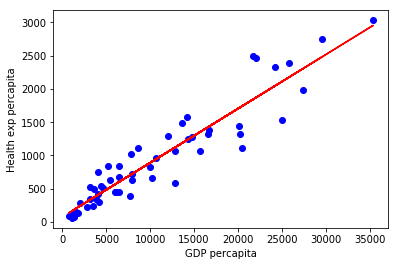

In [9]:
#Mengeplot hasil regresi
plt.scatter(train.gdppercapita, train.healthexppercapita,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("GDP percapita")
plt.ylabel("Health exp percapita")


In [10]:
#Untuk menguji keakuratan data dihitung Root MSE dan R-Squared
from sklearn.metrics import mean_squared_error, r2_score

test_x = np.asanyarray(test[['gdppercapita']])
test_y = np.asanyarray(test[['healthexppercapita']])
test_y_ = regr.predict(test_x)

rmse = np.sqrt(mean_squared_error(test_y,test_y_))
r2 = r2_score(test_y,test_y_)
print(rmse)
print(r2)


65.69305116733335
0.9025603085331441


### Analisis Model Polynomial

242.49417470205358
0.8832341187030435


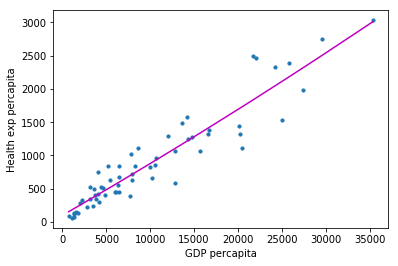

In [11]:
import matplotlib.pyplot as plt
import operator

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#mengimpor dataset
x = x_data[:, np.newaxis]
y = y_data[:, np.newaxis]

#fitting polynomial Regression ke dataset
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#Menghitung keakuratan hasil regresi
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# Mengurutkan nilai x sebelum plot garis
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
#Visualisasi hasil regresi polynomial
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.xlabel("GDP percapita")
plt.ylabel("Health exp percapita")
plt.show()

### Klasifikasi
### *Distribusi Kelas

In [12]:
# Melihat distribusi class Status
print(df.groupby('Status').size())

Status
Developed         14
Developing        45
Leastdeveloped     4
dtype: int64


In [27]:
#Melihat data apakah lengkap atau tidak
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 20 columns):
Country               63 non-null object
literacyrate          63 non-null float64
homicidiesper100k     63 non-null float64
electricity           63 non-null float64
Schooling             63 non-null float64
HIV.AIDS              63 non-null float64
Status                63 non-null object
wateraccess           63 non-null float64
tuberculosis          63 non-null float64
inflation             63 non-null float64
healthexppercapita    63 non-null float64
fertilityrate         63 non-null float64
lifeexp               63 non-null float64
internet              63 non-null float64
gdppercapita          63 non-null float64
CO2                   63 non-null float64
forest                63 non-null float64
urbanpop              63 non-null float64
urbanpopgrowth        63 non-null float64
leastdeveloped        63 non-null int64
dtypes: float64(17), int64(1), object(2)
memory usage: 9.9+ K

In [28]:
#Menghilangkan variabel yang bukan numerik
x = df.drop(["leastdeveloped","Country","Status"], axis = 1)
x.head()

,literacyrate,homicidiesper100k,electricity,Schooling,HIV.AIDS,wateraccess,tuberculosis,inflation,healthexppercapita,fertilityrate,lifeexp,internet,gdppercapita,CO2,forest,urbanpop,urbanpopgrowth
0,96.845299,4.005786,2309.366503,14.2,0.1,95.1,16.0,1.613042,517.071413,1.710,77.963,60.100000,4578.667934,1.582049,28.191972,56.423,1.652458
1,72.648679,1.475201,1356.264554,14.4,0.1,84.0,72.0,2.916927,624.662826,2.890,75.641,29.500000,5466.425778,3.326497,0.818057,70.221,2.826317
2,99.744413,2.477445,1965.783733,12.7,0.1,100.0,57.0,2.981309,426.113567,1.634,74.255,54.622806,3994.712355,1.704295,11.654373,63.112,-0.465285
3,99.771144,2.483225,2202.393918,12.2,0.1,86.2,76.0,1.389726,718.455376,1.970,71.800,75.000016,7891.313147,3.845641,13.466485,54.422,1.798360
4,94.556792,0.523796,19592.231949,14.5,0.1,100.0,16.0,2.646291,1529.895347,2.078,76.622,90.503133,24983.379015,23.145268,0.765240,88.915,4.823102


In [29]:
#Menentukan variabel dependen
y = df["leastdeveloped"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: leastdeveloped, dtype: int64

In [30]:
#Membagi data training dan testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [31]:
#Mengaktifkan package dan syntax untuk mengubah skala data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train,y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test,y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 1.00


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ida = LinearDiscriminantAnalysis()
ida.fit(x_train, y_train)

print('Accuracy of LDA classifier on training set: {:.2f}'.format(ida.score(x_train,y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'.format(ida.score(x_test,y_test)))

Accuracy of LDA classifier on training set: 0.96
Accuracy of LDA classifier on test set: 1.00


In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

print('Accuracy of LDA classifier on training set: {:.2f}'.format(gnb.score(x_train,y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'.format(gnb.score(x_test,y_test)))

Accuracy of LDA classifier on training set: 0.98
Accuracy of LDA classifier on test set: 1.00


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
pred = ida.predict(x_test)
print (confusion_matrix(y_test,pred))
print (classification_report(y_test, pred))

[[13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

